<div style="padding:18px;color:black;margin:0;font-size:33px;text-align:center;display:fill;border-radius:5px;background-color:#00778B;overflow:hidden;"><b>Project Ignite: Using Geo AI and Predictive Analytics Against Climate Change-Induced Bushfires in the Bahamas</b></div>


<div style="padding:10px;color:black;margin:0;font-size:15px;text-align:center;display:fill;border-radius:5px;background-color:#D3E8EA;overflow:hidden;"><b>Giatri Lalla - Department of Geomatics Engineering and Land Management, Faculty of Engineering, UWI - St. Augustine<br></div


In [1]:
import os
import rasterio
import numpy as np

#First Sentinel Image
import os
import rasterio
import numpy as np

# Set the input and output directories
input_dir = "//kaggle/input/sentinel-2lic232023"
output_dir = "/kaggle/working/"

# Define a function to scale pixel values from the raw data to reflectance
def scale_band(band):
    return band * 0.0001

# Combine the Landsat bands into a single composite image
datasets = []
for i in range(1, 9):
    file_path = os.path.join(input_dir, f"2023-03-21-00_00_2023-03-21-23_59_Sentinel-2_L2A_B0{i}_(Raw).tiff")
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    with rasterio.open(file_path) as src:
        data = scale_band(src.read(1))
        datasets.append(data)
        print(f"Band {i}: shape={data.shape}, dtype={data.dtype}")

if not datasets:
    print("No valid files found.")
    exit()

stacked = np.stack(datasets)
print(f"Stacked array shape={stacked.shape}, dtype={stacked.dtype}")

# Write the combined image to a new GeoTIFF file in the output directory
file_path = os.path.join(output_dir, "sentinel_composite1.tiff")
with rasterio.open(file_path, "w", height=datasets[0].shape[0], width=datasets[0].shape[1], count=len(datasets),
                   dtype=datasets[0].dtype, crs=src.crs, transform=src.transform) as dst:
    dst.write(stacked)
print(f"Output file written to {file_path}.")

#Second Sentinel Image
# Set the input and output directories
input_dir = "/kaggle/input/sentinel-2lic2023"
output_dir = "/kaggle/working/"

# Define a function to scale pixel values from the raw data to reflectance
def scale_band(band):
    return band * 0.0001

# Combine the Landsat bands into a single composite image
datasets = []
for i in range(1, 9):
    file_path = os.path.join(input_dir, f"2023-03-23-00_00_2023-03-23-23_59_Sentinel-2_L2A_B0{i}_(Raw).tiff")
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        continue
    with rasterio.open(file_path) as src:
        data = scale_band(src.read(1))
        datasets.append(data)
        print(f"Band {i}: shape={data.shape}, dtype={data.dtype}")

if not datasets:
    print("No valid files found.")
    exit()

stacked = np.stack(datasets)
print(f"Stacked array shape={stacked.shape}, dtype={stacked.dtype}")

# Write the combined image to a new GeoTIFF file in the output directory
file_path = os.path.join(output_dir, "sentinelgbcomposite2.tiff")
with rasterio.open(file_path, "w", height=datasets[0].shape[0], width=datasets[0].shape[1], count=len(datasets),
                   dtype=datasets[0].dtype, crs=src.crs, transform=src.transform) as dst:
    dst.write(stacked)
print(f"Output file written to {file_path}.")

Band 1: shape=(1643, 2500), dtype=float64
Band 2: shape=(1643, 2500), dtype=float64
Band 3: shape=(1643, 2500), dtype=float64
Band 4: shape=(1643, 2500), dtype=float64
Band 5: shape=(1643, 2500), dtype=float64
Band 6: shape=(1643, 2500), dtype=float64
Band 7: shape=(1643, 2500), dtype=float64
Band 8: shape=(1643, 2500), dtype=float64
Stacked array shape=(8, 1643, 2500), dtype=float64
Output file written to /kaggle/working/sentinel_composite1.tiff.
Band 1: shape=(1643, 2500), dtype=float64
Band 2: shape=(1643, 2500), dtype=float64
Band 3: shape=(1643, 2500), dtype=float64
Band 4: shape=(1643, 2500), dtype=float64
Band 5: shape=(1643, 2500), dtype=float64
Band 6: shape=(1643, 2500), dtype=float64
Band 7: shape=(1643, 2500), dtype=float64
Band 8: shape=(1643, 2500), dtype=float64
Stacked array shape=(8, 1643, 2500), dtype=float64
Output file written to /kaggle/working/sentinelgbcomposite2.tiff.


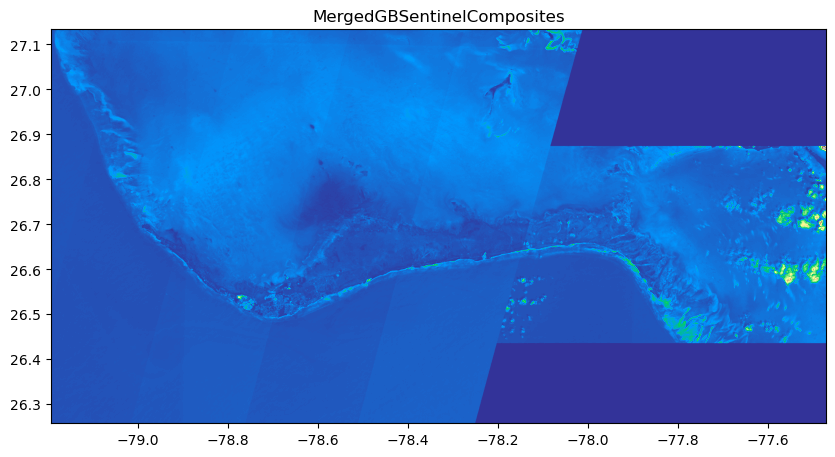

In [2]:
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt

# Open the input GeoTIFF files
file_paths = ["/kaggle/working/sentinel_composite1.tiff", "/kaggle/working/sentinelgbcomposite2.tiff"]
src_files_to_mosaic = []
for file_path in file_paths:
    src = rasterio.open(file_path)
    src_files_to_mosaic.append(src)

# Merge the input GeoTIFF files
mosaic, out_trans = merge(src_files_to_mosaic)

# Update the metadata of the merged GeoTIFF file
out_meta = src.meta.copy()
out_meta.update({"driver": "GTiff", "height": mosaic.shape[1], "width": mosaic.shape[2], "transform": out_trans})

# Save the merged GeoTIFF file
with rasterio.open("/kaggle/working/gbsentinelmosaic.tiff", "w", **out_meta) as dest:
    dest.write(mosaic)

# Visualize the merged GeoTIFF file
with rasterio.open("/kaggle/working/gbsentinelmosaic.tiff") as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    show(src, cmap='terrain', ax=ax)
    ax.set_title("MergedGBSentinelComposites")
    plt.show()

In [3]:
import rasterio
import numpy as np

#Indice 1
# Open the GeoTIFF file
with rasterio.open('/kaggle/working/gbsentinelmosaic.tiff') as src:
    red = src.read(3)  # Read the red band
    nir = src.read(4)  # Read the near-infrared band
    profile = src.profile  # Get the metadata

# Calculate NDVI
ndvi = np.true_divide((nir.astype(float) - red.astype(float)), (nir + red))

# Write the NDVI to a new GeoTIFF file
profile.update(count=1, dtype=rasterio.float32)
with rasterio.open('/kaggle/working/gbndvi.tiff', 'w', **profile) as dst:
    dst.write(ndvi.astype(rasterio.float32), 1)

#Indice 2
# Read in the geotiff file as a raster dataset
raster_dataset = rasterio.open("/kaggle/working/gbsentinelmosaic.tiff")

# Read in the dc band as a numpy array
dc = raster_dataset.read(1)

# Convert dc to a numpy array
dc = np.array(dc)

# Define isi
isi = 20

# Calculate BUI
bui = (dc / 10) * (isi / 10)

# Write the BUI to a new geotiff file
with rasterio.open("/kaggle/working/gbbui_file.tiff", 'w', **profile) as dst:
    dst.write(bui.astype(rasterio.float32), 1)
    
#Indice 3

# Read in the geotiff file as a raster dataset
raster_dataset = rasterio.open("/kaggle/working/gbsentinelmosaic.tiff")

# Read in the RH and wind speed bands as numpy arrays
rh = raster_dataset.read(1)
wind_speed = raster_dataset.read(2)

# Convert RH and wind speed to numpy arrays
rh = np.array(rh)
wind_speed = np.array(wind_speed)

# Calculate ISI
B = 0.00146
isi = np.exp(B * np.log(rh / 100.0) - 0.05 * wind_speed + 0.1) * 0.208

# Write the ISI to a new geotiff file
profile = raster_dataset.profile
profile.update(count=1, dtype=rasterio.float32)
with rasterio.open("/kaggle/working/gbisi_file.tiff", 'w', **profile) as dst:
    dst.write(isi.astype(rasterio.float32), 1)
    
#Indice 4

# Read in the BUI and ISI geotiff files as raster datasets
bui_dataset = rasterio.open("/kaggle/working/gbbui_file.tiff")
isi_dataset = rasterio.open("/kaggle/working/gbisi_file.tiff")

# Read in the BUI and ISI bands as numpy arrays
bui = bui_dataset.read(1)
isi = isi_dataset.read(1)

# Calculate the FDI
fdi = np.exp(0.987 * np.log(bui) + 0.611 * np.log(isi) - 1.715)

# Write the FDI to a new geotiff file
with rasterio.open("/kaggle/working/gbfdi.tiff", 'w', **bui_dataset.profile) as dst:
    dst.write(fdi.astype(rasterio.float32), 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == "":
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: divide by zero encountered in log


In [4]:
import csv
import os

# Set the modis fire directory where the CSV files are located
directory = '/kaggle/input/modisfire'

# Create a new CSV file for the combined data
with open('modiscombinedfires.csv', 'w', newline='') as combined_file:
    writer = csv.writer(combined_file)

    # Loop through each CSV file in the directory and append its data to the combined file
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            with open(os.path.join(directory, filename), 'r') as csv_file:
                reader = csv.reader(csv_file)
                for row in reader:
                    writer.writerow(row)

# Set the viirs directory where the CSV files are located
directory = '/kaggle/input/viirsfire'

# Create a new CSV file for the combined data
with open('viirscombinedfires', 'w', newline='') as combined_file:
    writer = csv.writer(combined_file)

    # Loop through each CSV file in the directory and append its data to the combined file
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            with open(os.path.join(directory, filename), 'r') as csv_file:
                reader = csv.reader(csv_file)
                for row in reader:
                    writer.writerow(row)

In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load CSV file into pandas DataFrame
df = pd.read_csv('/kaggle/input/combinedfiredata/combined_data (1).csv')

# Convert latitude and longitude columns to numeric data types
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Create a Point geometry column using the latitude and longitude values
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# Create a GeoDataFrame from the DataFrame and the geometry column
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set the CRS of the GeoDataFrame
gdf.crs = {'init': 'epsg:4326'}


# Save the GeoDataFrame as a shapefile with an Esri driver
gdf.to_file("modisfires.shp", driver='ESRI Shapefile')

#Part2

# Load the point and polygon shapefiles
points = gpd.read_file('/kaggle/working/modisfires.shp')
line = gpd.read_file('/kaggle/input/gbcoastline-gbpa/Coastline.shp')

# Reproject the points to match the CRS of the polygon shapefile
points = points.to_crs(line.crs)

# Clip the points to the polygon boundaries
clipped_points = gpd.clip(points, line)

# Save the clipped points to a new shapefile
if not clipped_points.empty:
    clipped_points.to_file('modisgrandbahama.shp')
else:
    print('No points were clipped.')
    
#Save the GeoDataFrame as a CSV file
clipped_points.to_csv("gbmodisclip.csv", index=False)


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [6]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Load CSV file into pandas DataFrame
df = pd.read_csv('/kaggle/input/combinedfiredata/viirscombined_data.csv')

# Convert latitude and longitude columns to numeric data types
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Create a Point geometry column using the latitude and longitude values
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# Create a GeoDataFrame from the DataFrame and the geometry column
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Set the CRS of the GeoDataFrame
gdf.crs = {'init': 'epsg:4326'}

# Save the GeoDataFrame to a shapefile
gdf.to_file('/kaggle/working/viirsfires.shp', driver='ESRI Shapefile')

#Part 2

# Load the point and polygon shapefiles
points = gpd.read_file('/kaggle/working/viirsfires.shp')
line = gpd.read_file('/kaggle/input/gbcoastline-gbpa/Coastline.shp')

# Reproject the points to match the CRS of the polygon shapefile
points = points.to_crs(line.crs)

# Clip the points to the polygon boundaries
clipped_points = gpd.clip(points, line)

# Save the clipped points to a new shapefile
if not clipped_points.empty:
    clipped_points.to_file('viirsgrandbahama.shp')
else:
    print('No points were clipped.')

#Save the GeoDataFrame as a CSV file
clipped_points.to_csv("gbviirsclip.csv", index=False)

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

# Load the train, test, and sample solution datasets
train_data = pd.read_csv('/kaggle/input/modisfirepredictiondata/train.csv')
test_data = pd.read_csv('/kaggle/input/modisfirepredictiondata/train.csv')
sample_solution = pd.read_csv('/kaggle/input/modisfirepredictiondata/sample_solution.csv')

# Fill missing values with mean
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

# Split the train dataset into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(['latitude', 'longitude'], axis=1), 
                                                  train_data[['latitude', 'longitude']],
                                                  test_size=0.3,
                                                  random_state=42)

# Train a Lasso model to predict the latitude
lasso_lat = Lasso(alpha=0.1)
lasso_lat.fit(X_train, y_train['latitude'])

# Train a Lasso model to predict the longitude
lasso_lon = Lasso(alpha=0.1)
lasso_lon.fit(X_train, y_train['longitude'])

# Train a CatBoost model to predict the latitude
catboost_lat = CatBoostRegressor(iterations=5000, learning_rate=0.1, depth=3, loss_function='RMSE')
catboost_lat.fit(X_train, y_train['latitude'], verbose=False)

# Train a CatBoost model to predict the longitude
catboost_lon = CatBoostRegressor(iterations=5000, learning_rate=0.1, depth=3, loss_function='RMSE')
catboost_lon.fit(X_train, y_train['longitude'], verbose=False)

# Train a LightGBM model to predict the latitude
lgbm_lat = LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=5000)
lgbm_lat.fit(X_train, y_train['latitude'])

# Train a LightGBM model to predict the longitude
lgbm_lon = LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=5000)
lgbm_lon.fit(X_train, y_train['longitude'])

# Train an XGBoost model to predict the latitude
xgboost_lat = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10)
xgboost_lat.fit(X_train, y_train['latitude'])

# Train an XGBoost model to predict the longitude
xgboost_lon = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10)
xgboost_lon.fit(X_train, y_train['longitude'])

#Combine the models using a Voting Regressor for latitude prediction
ensemble_lat = VotingRegressor(estimators=[('lasso', lasso_lat), ('catboost', catboost_lat), ('lgbm', lgbm_lat), ('xgboost', xgboost_lat)])
ensemble_lat.fit(X_train, y_train['latitude'])

#Combine the models using a Voting Regressor for longitude prediction
ensemble_lon = VotingRegressor(estimators=[('lasso', lasso_lon), ('catboost', catboost_lon), ('lgbm', lgbm_lon), ('xgboost', xgboost_lon)])
ensemble_lon.fit(X_train, y_train['longitude'])

#Evaluate the models on the validation set
y_pred_val_lat = ensemble_lat.predict(X_val)
y_pred_val_lon = ensemble_lon.predict(X_val)

mse_lat = mean_squared_error(y_val['latitude'], y_pred_val_lat)
mse_lon = mean_squared_error(y_val['longitude'], y_pred_val_lon)

print(f'Validation set MSE for latitude: {mse_lat:.4f}')
print(f'Validation set MSE for longitude: {mse_lon:.4f}')

#Predict the test set and save the solution
test_data['latitude'] = ensemble_lat.predict(test_data.drop(['latitude', 'longitude'], axis=1))
test_data['longitude'] = ensemble_lon.predict(test_data.drop(['latitude', 'longitude'], axis=1))

test_data[['latitude', 'longitude']].to_csv('modispredsubmission.csv', index=False)

0:	learn: 0.9327956	total: 939us	remaining: 4.7s
1:	learn: 0.9260630	total: 1.69ms	remaining: 4.22s
2:	learn: 0.9205020	total: 2.36ms	remaining: 3.93s
3:	learn: 0.9159128	total: 3.11ms	remaining: 3.88s
4:	learn: 0.9119264	total: 3.81ms	remaining: 3.81s
5:	learn: 0.9089422	total: 4.49ms	remaining: 3.73s
6:	learn: 0.9058790	total: 5.14ms	remaining: 3.67s
7:	learn: 0.9025525	total: 5.9ms	remaining: 3.68s
8:	learn: 0.8996362	total: 6.6ms	remaining: 3.66s
9:	learn: 0.8970512	total: 7.41ms	remaining: 3.7s
10:	learn: 0.8950661	total: 8.19ms	remaining: 3.71s
11:	learn: 0.8930981	total: 8.88ms	remaining: 3.69s
12:	learn: 0.8919074	total: 9.52ms	remaining: 3.65s
13:	learn: 0.8905323	total: 10.2ms	remaining: 3.62s
14:	learn: 0.8887790	total: 10.9ms	remaining: 3.63s
15:	learn: 0.8874374	total: 11.6ms	remaining: 3.63s
16:	learn: 0.8853542	total: 12.5ms	remaining: 3.67s
17:	learn: 0.8843842	total: 13.3ms	remaining: 3.68s
18:	learn: 0.8828574	total: 14.1ms	remaining: 3.69s
19:	learn: 0.8815151	total:

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error

# Load the train, test, and sample solution datasets
train_data = pd.read_csv('/kaggle/input/viirsfirepredictiondata/train.csv')
test_data = pd.read_csv('/kaggle/input/viirsfirepredictiondata/test.csv')
sample_solution = pd.read_csv('/kaggle/input/viirsfirepredictiondata/sample_solution.csv')

# Fill missing values with mean
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

# Split the train dataset into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(train_data.drop(['latitude', 'longitude'], axis=1), 
                                                  train_data[['latitude', 'longitude']],
                                                  test_size=0.3,
                                                  random_state=42)

# Train a Lasso model to predict the latitude
lasso_lat = Lasso(alpha=0.1)
lasso_lat.fit(X_train, y_train['latitude'])

# Train a Lasso model to predict the longitude
lasso_lon = Lasso(alpha=0.1)
lasso_lon.fit(X_train, y_train['longitude'])

# Train a CatBoost model to predict the latitude
catboost_lat = CatBoostRegressor(iterations=5000, learning_rate=0.1, depth=3, loss_function='RMSE')
catboost_lat.fit(X_train, y_train['latitude'], verbose=False)

# Train a CatBoost model to predict the longitude
catboost_lon = CatBoostRegressor(iterations=5000, learning_rate=0.1, depth=3, loss_function='RMSE')
catboost_lon.fit(X_train, y_train['longitude'], verbose=False)

# Train a LightGBM model to predict the latitude
lgbm_lat = LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=5000)
lgbm_lat.fit(X_train, y_train['latitude'])

# Train a LightGBM model to predict the longitude
lgbm_lon = LGBMRegressor(num_leaves=31, learning_rate=0.05, n_estimators=5000)
lgbm_lon.fit(X_train, y_train['longitude'])

# Train an XGBoost model to predict the latitude
xgboost_lat = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10)
xgboost_lat.fit(X_train, y_train['latitude'])

# Train an XGBoost model to predict the longitude
xgboost_lon = XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10)
xgboost_lon.fit(X_train, y_train['longitude'])

#Combine the models using a Voting Regressor for latitude prediction
ensemble_lat = VotingRegressor(estimators=[('lasso', lasso_lat), ('catboost', catboost_lat), ('lgbm', lgbm_lat), ('xgboost', xgboost_lat)])
ensemble_lat.fit(X_train, y_train['latitude'])

#Combine the models using a Voting Regressor for longitude prediction
ensemble_lon = VotingRegressor(estimators=[('lasso', lasso_lon), ('catboost', catboost_lon), ('lgbm', lgbm_lon), ('xgboost', xgboost_lon)])
ensemble_lon.fit(X_train, y_train['longitude'])

#Evaluate the models on the validation set
y_pred_val_lat = ensemble_lat.predict(X_val)
y_pred_val_lon = ensemble_lon.predict(X_val)

mse_lat = mean_squared_error(y_val['latitude'], y_pred_val_lat)
mse_lon = mean_squared_error(y_val['longitude'], y_pred_val_lon)

print(f'Validation set MSE for latitude: {mse_lat:.4f}')
print(f'Validation set MSE for longitude: {mse_lon:.4f}')

#Predict the test set and save the solution
test_data['latitude'] = ensemble_lat.predict(test_data.drop(['latitude', 'longitude'], axis=1))
test_data['longitude'] = ensemble_lon.predict(test_data.drop(['latitude', 'longitude'], axis=1))

test_data[['latitude', 'longitude']].to_csv('viirspredsubmission.csv', index=False)

0:	learn: 1.0983543	total: 1.58ms	remaining: 7.91s
1:	learn: 1.0952884	total: 3.26ms	remaining: 8.15s
2:	learn: 1.0879282	total: 4.95ms	remaining: 8.24s
3:	learn: 1.0830246	total: 6.55ms	remaining: 8.18s
4:	learn: 1.0808973	total: 8.24ms	remaining: 8.23s
5:	learn: 1.0756556	total: 9.85ms	remaining: 8.2s
6:	learn: 1.0729587	total: 11.4ms	remaining: 8.14s
7:	learn: 1.0707844	total: 13ms	remaining: 8.14s
8:	learn: 1.0672291	total: 14.7ms	remaining: 8.14s
9:	learn: 1.0607856	total: 16.3ms	remaining: 8.13s
10:	learn: 1.0594475	total: 18.4ms	remaining: 8.36s
11:	learn: 1.0556329	total: 20.1ms	remaining: 8.36s
12:	learn: 1.0535346	total: 21.7ms	remaining: 8.33s
13:	learn: 1.0510090	total: 23.3ms	remaining: 8.28s
14:	learn: 1.0465110	total: 24.9ms	remaining: 8.28s
15:	learn: 1.0435726	total: 26.5ms	remaining: 8.25s
16:	learn: 1.0421390	total: 28ms	remaining: 8.22s
17:	learn: 1.0407746	total: 29.7ms	remaining: 8.22s
18:	learn: 1.0383424	total: 31.3ms	remaining: 8.21s
19:	learn: 1.0373839	total: